In [18]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Crawl Data from a website


In [2]:
page_index =1
count =0
check =True
data =[]
while check:
        url = f"https://philong.com.vn/tim?scat_id=&q=&page={page_index}"
        response = requests.get(url)
        

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find all product categories
        products = soup.find_all('div', class_='p-item')
        website = "https://philong.com.vn"
        if products ==[]:
            break
        page_index+=1
        # Loop through each category and extract relevant information
        for product in products:
            # Extract the category name
            
            try:

                name = product.find('h4').text.strip()
                price = product.find(class_='p-price').text.strip()
                unprice = product.find(class_='p-unprice').text.strip()
                summary = product.find(class_='p-summary').text.strip()
                status=1
                brand_tag = product.find(class_='p-brand')
                brand = brand_tag.find('img').get('alt')
                if (product.find(class_='btn-add')!=None):
                    status =1
                else:
                    status =0

                if (product.find(class_='p-sale')!=None):
                    sale = product.find(class_ ='p-sale').text.strip() 
                else:
                    sale ="N/A"
                if (product.find(class_='p-promotion')!=None):
                    promotion = product.find(class_ ='p-promotion').text.strip() 
                else:
                    promotion ="N/A"
                row = [website,name,price,unprice,sale,promotion,summary,status,brand]
                
                data.append(row)
            except AttributeError:
                sale =''
                promotion=''
                unprice =0
            
       

print(len(data))
df = pd.DataFrame(data, columns=['Website','Name', 'Price', 'Unprice','Sale','Promotion','Summary','Status','Brand'])
df.to_csv('crawl.csv', index=False)


6943


In [44]:
df = pd.read_csv('crawl.csv')


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6943 entries, 0 to 6942
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Website    6943 non-null   object
 1   Name       6943 non-null   object
 2   Price      6943 non-null   object
 3   Unprice    1469 non-null   object
 4   Sale       1001 non-null   object
 5   Promotion  882 non-null    object
 6   Summary    6232 non-null   object
 7   Status     6943 non-null   int64 
 8   Brand      6943 non-null   object
dtypes: int64(1), object(8)
memory usage: 488.3+ KB


In [9]:
df.head(20)

,Website,Name,Price,Unprice,Sale,Promotion,Summary,Status,Brand
0,https://philong.com.vn,"Laptop MSI Katana 15 B13VEK-252VN (i7-13620H, ...",32450000,NaN,NaN,Khuyến mại: Vòng quay may mắn trúng phiếu mua ...,"CPU: Intel Core i7-13620H (10 nhân/ 16 luồng, ...",1,msi
1,https://philong.com.vn,Chuột Apple Magic Mouse Silver MK2E3ZA/A,1690000,2.390.000 đ,-29%,NaN,Thiết kế mỏng nhẹ tạo cảm giác thoải mái khi s...,1,Apple
2,https://philong.com.vn,Router WiFi 6 Tplink Archer AX53 Gigabit Băng ...,1690000,NaN,NaN,NaN,Wi-Fi 6 Gigabit thế hệ tiếp theo tốc độ — 2402...,0,TP-Link
3,https://philong.com.vn,Router Wifi Băng Tầng Kép AC1200 TP-Link Arche...,790000,NaN,NaN,NaN,Tốc độ WIFI WiFi Wave2 802.11ac– 867 Mbps trên...,1,TP-Link
4,https://philong.com.vn,"Máy In Lazer Ricoh MP 2014D (A3 2 Mặt, SCAN, C...",13900000,NaN,NaN,Khuyến mại: Tặng Ổ cắm điện Pisen 005EP/PSCXB-...,"Tốc độ in: 20 bản/phút, in 2 mặt tự động\nT...",0,ricoh
5,https://philong.com.vn,Laptop HP PROBOOK 440 G9 (6M0X2PA) (Intel Core...,17990000,20.090.000 đ,-10%,Khuyến mại: Chuột không dây yên tĩnh HP Z3700 ...,"CPU: Intel Core i5-1235U (1.3Ghz up to 4.4GHz,...",1,hp
6,https://philong.com.vn,"Bộ phát wifi TOTOLINK X2000R, băng tầng kép AX...",990000,NaN,NaN,NaN,"Chuẩn Wi-Fi 6 (IEEE 802.11ax) thế hệ mới nhất,...",1,Totolink
7,https://philong.com.vn,USB WIFI 6 TOTOLINK X6100UA (băng tần kép AX1800),650000,NaN,NaN,NaN,Tương thích chuẩn Wi-Fi IEEE 802.11a/b/g/n/ac/...,1,Totolink
8,https://philong.com.vn,Bộ Phát Wifi 6 TP-Link Archer AX23 AX1800,1500000,NaN,NaN,NaN,Wi-Fi siêu nhanh 1.8 Gbps – Tận hưởng truyền t...,1,TP-Link
9,https://philong.com.vn,MacBook Pro M2 2022 13.3 inch (MNEP3SAA) (8 c...,30290000,34.490.000 đ,-12%,Khuyến mại: Phiếu mua hàng 200.000đ áp dụng mu...,"CPU: Apple M2 8 nhân, 2.4Ghz\nRam: 8GB LPDDR4/...",1,Apple


Thay đổi những sản phẩm có giá liên hệ thành 0đ


In [46]:
df['Price'] = df['Price'].replace("Giá: Liên hệ","0 đ")

Thay đổi giá sang định dạng số

In [47]:
prices = df['Price']
prices = [''.join(price[:-2].split('.')) for price in prices]
df['Price'] = [int(price) for price in prices]

### 2. Làm sạch dữ liệu:
Thay đổi những thuộc tính của dữ liệu:
- Mức sale trong dữ liệu là âm, chuyển thành dương

- Ghi in thường các kí tự thuộc trường Name
- Ghép giá cả lại thành 1 số


Fill các giá trị NaN:
- Sale: Nếu không có là 0%
- Promotion: Nếu không có sẽ là "Không có"
- Summary: Nếu không có sẽ là "Không có"




In [48]:
null_percents = df.isnull().mean()*100
null_percents

Website       0.000000
Name          0.000000
Price         0.000000
Unprice      78.841999
Sale         85.582601
Promotion    87.296558
Summary      10.240530
Status        0.000000
Brand         0.000000
dtype: float64

In [49]:
names = df['Name']
names =[str(name).lower().strip() for name in names]
df['Name'] = names

In [51]:
brands = df['Brand']
brands = [str(brand).lower().strip() for brand in brands]

df['Brand'] = brands

In [53]:
df['Sale'].fillna('0%',inplace=True)
df['Promotion'].fillna('Không có',inplace=True)
df['Summary'].fillna('Không có',inplace=True)
df['Unprice'].fillna(df['Price'],inplace=True)




In [54]:
null_percents = df.isnull().mean()*100
null_percents

Website      0.0
Name         0.0
Price        0.0
Unprice      0.0
Sale         0.0
Promotion    0.0
Summary      0.0
Status       0.0
Brand        0.0
dtype: float64

In [55]:
df['Unprice'] = df['Unprice'].apply(lambda x: ''.join(x[:-2].split('.')) if str(x).endswith('đ') else x)
df['Unprice']

0       32450000
1        2390000
2        1690000
3         790000
4       13900000
          ...   
6938           0
6939           0
6940           0
6941           0
6942     1450000
Name: Unprice, Length: 6943, dtype: object

In [56]:
df['Type'] = df.apply(lambda row: row['Name'].split(row['Brand'], 1)[0].strip() if row['Brand'] in row['Name'] else row['Name'][len(row['Brand']):].strip(), axis=1)


In [57]:
df.to_csv('cleaned.csv',index=False)

### 3. Thống kê dữ liệu:

In [58]:
df = pd.read_csv('cleaned.csv')
df.head(20)

,Website,Name,Price,Unprice,Sale,Promotion,Summary,Status,Brand,Type
0,https://philong.com.vn,"laptop msi katana 15 b13vek-252vn (i7-13620h, ...",32450000,32450000,0%,Khuyến mại: Vòng quay may mắn trúng phiếu mua ...,"CPU: Intel Core i7-13620H (10 nhân/ 16 luồng, ...",1,msi,laptop
1,https://philong.com.vn,chuột apple magic mouse silver mk2e3za/a,1690000,2390000,-29%,Không có,Thiết kế mỏng nhẹ tạo cảm giác thoải mái khi s...,1,apple,chuột
2,https://philong.com.vn,router wifi 6 tplink archer ax53 gigabit băng ...,1690000,1690000,0%,Không có,Wi-Fi 6 Gigabit thế hệ tiếp theo tốc độ — 2402...,0,tp-link,wifi 6 tplink archer ax53 gigabit băng tần kép...
3,https://philong.com.vn,router wifi băng tầng kép ac1200 tp-link arche...,790000,790000,0%,Không có,Tốc độ WIFI WiFi Wave2 802.11ac– 867 Mbps trên...,1,tp-link,router wifi băng tầng kép ac1200
4,https://philong.com.vn,"máy in lazer ricoh mp 2014d (a3 2 mặt, scan, c...",13900000,13900000,0%,Khuyến mại: Tặng Ổ cắm điện Pisen 005EP/PSCXB-...,"Tốc độ in: 20 bản/phút, in 2 mặt tự động\nT...",0,ricoh,máy in lazer
5,https://philong.com.vn,laptop hp probook 440 g9 (6m0x2pa) (intel core...,17990000,20090000,-10%,Khuyến mại: Chuột không dây yên tĩnh HP Z3700 ...,"CPU: Intel Core i5-1235U (1.3Ghz up to 4.4GHz,...",1,hp,laptop
6,https://philong.com.vn,"bộ phát wifi totolink x2000r, băng tầng kép ax...",990000,990000,0%,Không có,"Chuẩn Wi-Fi 6 (IEEE 802.11ax) thế hệ mới nhất,...",1,totolink,bộ phát wifi
7,https://philong.com.vn,usb wifi 6 totolink x6100ua (băng tần kép ax1800),650000,650000,0%,Không có,Tương thích chuẩn Wi-Fi IEEE 802.11a/b/g/n/ac/...,1,totolink,usb wifi 6
8,https://philong.com.vn,bộ phát wifi 6 tp-link archer ax23 ax1800,1500000,1500000,0%,Không có,Wi-Fi siêu nhanh 1.8 Gbps – Tận hưởng truyền t...,1,tp-link,bộ phát wifi 6
9,https://philong.com.vn,macbook pro m2 2022 13.3 inch (mnep3saa) (8 c...,30290000,34490000,-12%,Khuyến mại: Phiếu mua hàng 200.000đ áp dụng mu...,"CPU: Apple M2 8 nhân, 2.4Ghz\nRam: 8GB LPDDR4/...",1,apple,ok pro m2 2022 13.3 inch (mnep3saa) (8 core c...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6895 entries, 0 to 6894
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Website      6895 non-null   object  
 1   Name         6895 non-null   object  
 2   Price        6895 non-null   int64   
 3   Unprice      6895 non-null   object  
 4   Sale         6895 non-null   int64   
 5   Promotion    6895 non-null   object  
 6   Summary      6895 non-null   object  
 7   Status       6895 non-null   int64   
 8   Brand        6895 non-null   object  
 9   price_range  4576 non-null   category
 10  Type         6895 non-null   object  
dtypes: category(1), int64(3), object(7)
memory usage: 545.7+ KB


Thống kê top số lượng sản phẩm theo brand (hãng):

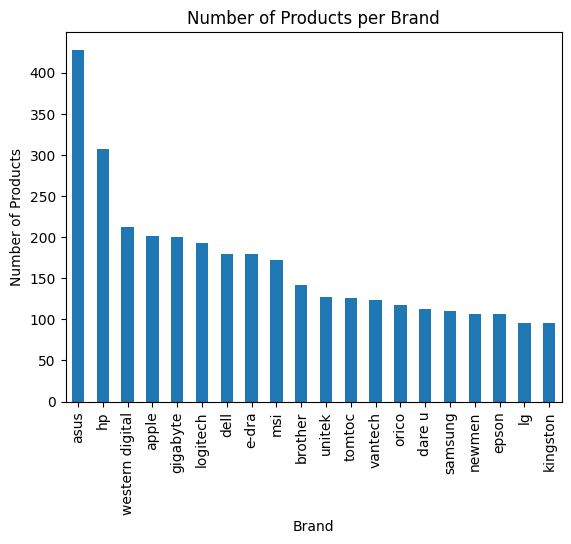

In [39]:
counts = df['Brand'].value_counts().head(20)

# create a bar chart of the data
counts.plot(kind='bar', title='Number of Products per Brand', xlabel='Brand', ylabel='Number of Products')

# display the plot
plt.show()

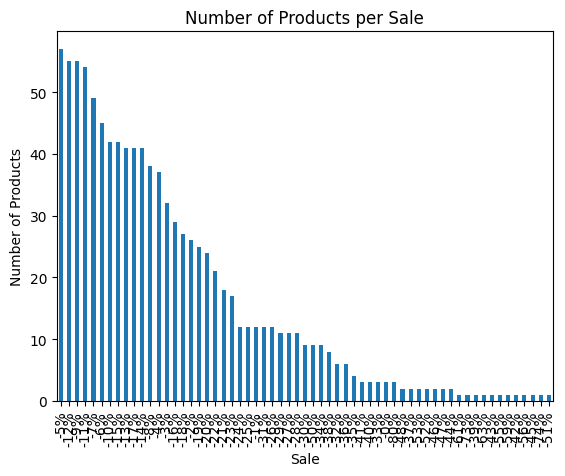

In [17]:
counts = df['Sale'].value_counts()

# create a bar chart of the data
counts.plot(kind='bar', title='Number of Products per Sale', xlabel='Sale', ylabel='Number of Products')

# display the plot
plt.show()

In [15]:
df['Brand'].nunique()

245

<AxesSubplot:xlabel='Price', ylabel='Brand'>

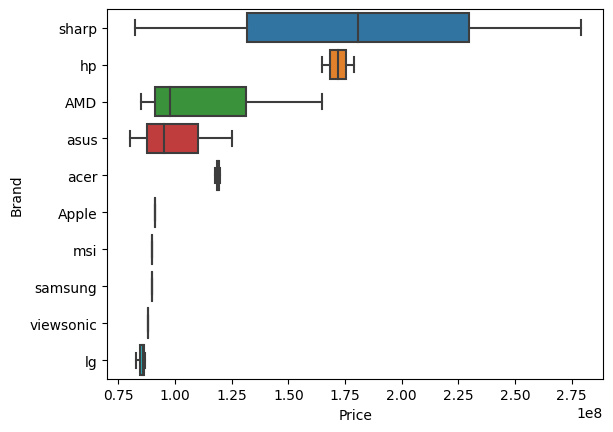

In [23]:
Brand_and_price = df[['Price','Brand']].nlargest(20,'Price')
sns.boxplot(x='Price', y='Brand', data=Brand_and_price)

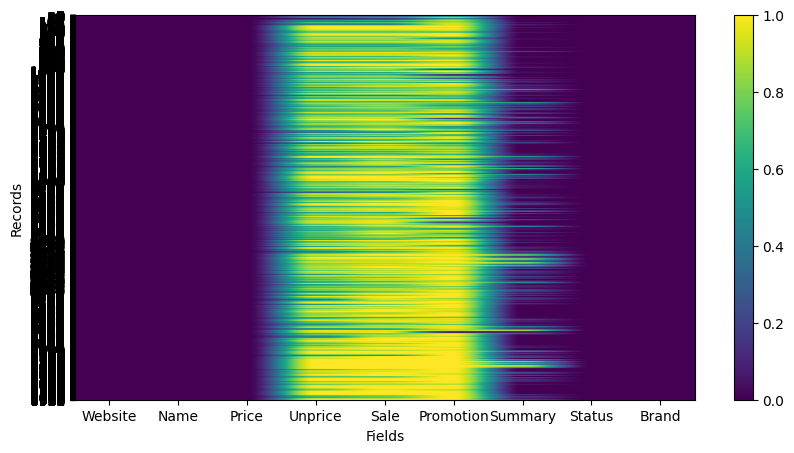

In [25]:
plt.figure(figsize=(10,5))
plt.imshow(df.isnull(), cmap='viridis', aspect='auto')
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.index)), df.index)
plt.xlabel('Fields')
plt.ylabel('Records')
plt.colorbar()
plt.show()

Giá trị lớn nhất và nhỏ nhất của sản phẩm:

In [40]:

df['Price'] = [int(price) for price in df['Price']]
non_zeros_price = df[df['Price']!=0]['Price']

print(df['Price'].max(),non_zeros_price.min())

279000000 8000


Thống kê sản phẩm theo mức giá:

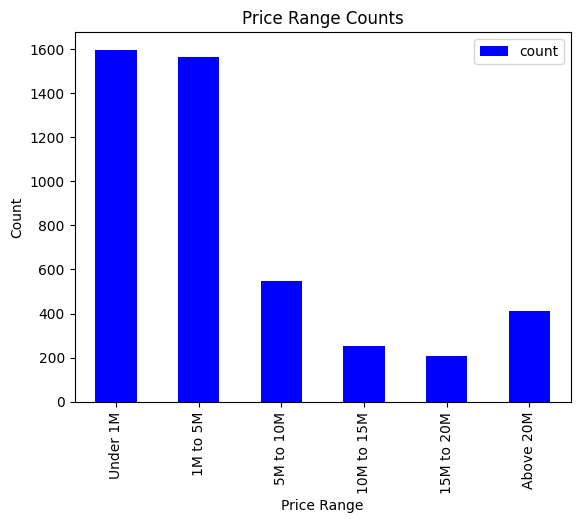

,Price,price_range
0,32450000,Above 20M
1,1690000,1M to 5M
2,1690000,1M to 5M
3,790000,Under 1M
4,13900000,10M to 15M
...,...,...
6890,0,NaN
6891,0,NaN
6892,0,NaN
6893,0,NaN


In [8]:
bins = [0, 1000000, 5000000, 10000000, 15000000, 20000000, float('inf')]

# Create a new column 'price_range' that contains the bin labels
df['price_range'] = pd.cut(df['Price'], bins=bins, labels=['Under 1M', '1M to 5M', '5M to 10M', '10M to 15M', '15M to 20M', 'Above 20M'])

# Group the DataFrame by 'price_range' and count the number of items in each bin
df_counts = df.groupby('price_range').size().reset_index(name='count')

# Display the counts for each price range bin
ax = df_counts.plot.bar(x='price_range', y='count', color='b')

# Set the title and labels for the plot
ax.set_title('Price Range Counts')
ax.set_xlabel('Price Range')
ax.set_ylabel('Count')

# Display the plot
plt.show()
df[['Price','price_range']]

Phân bố của sản phẩm theo hãng và trạng thái:

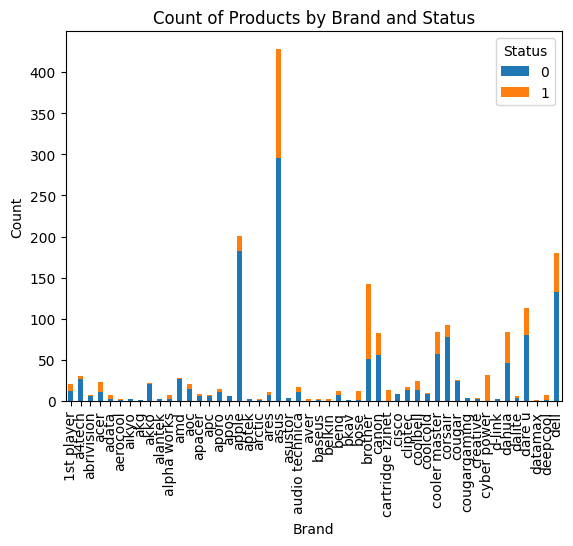

In [12]:
df_status = df.groupby(['Brand', 'Status']).size().unstack().head(50)
df_status.plot(kind='bar', stacked=True)
plt.title('Count of Products by Brand and Status')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

Top 10 sản phẩm có giá cao nhất:

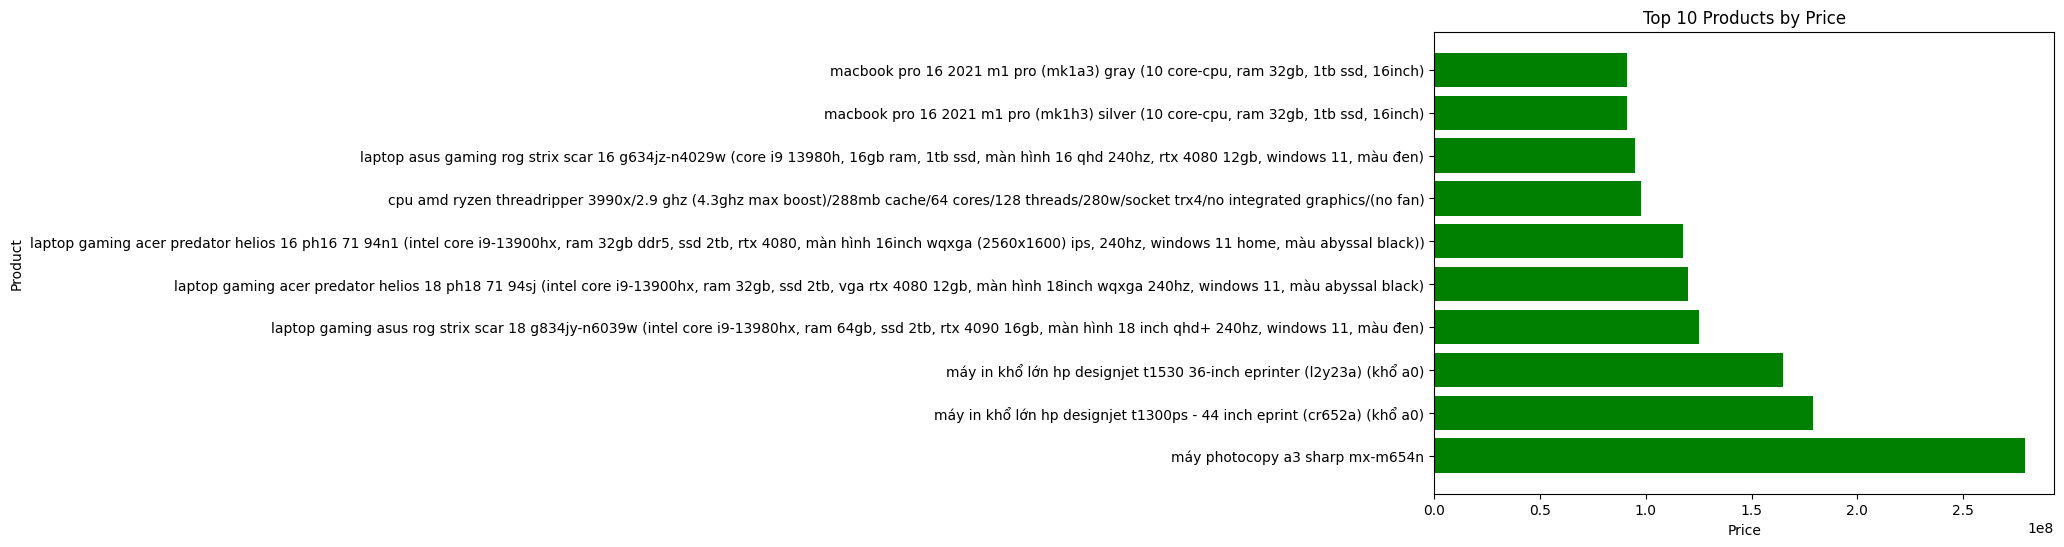

In [42]:
top_products = df.nlargest(10, 'Price')

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_products['Name'], top_products['Price'], color='green')
ax.set_xlabel('Price')
ax.set_ylabel('Product')
ax.set_title('Top 10 Products by Price')
plt.show()

Top 10 sản phẩm có giá thấp nhất:

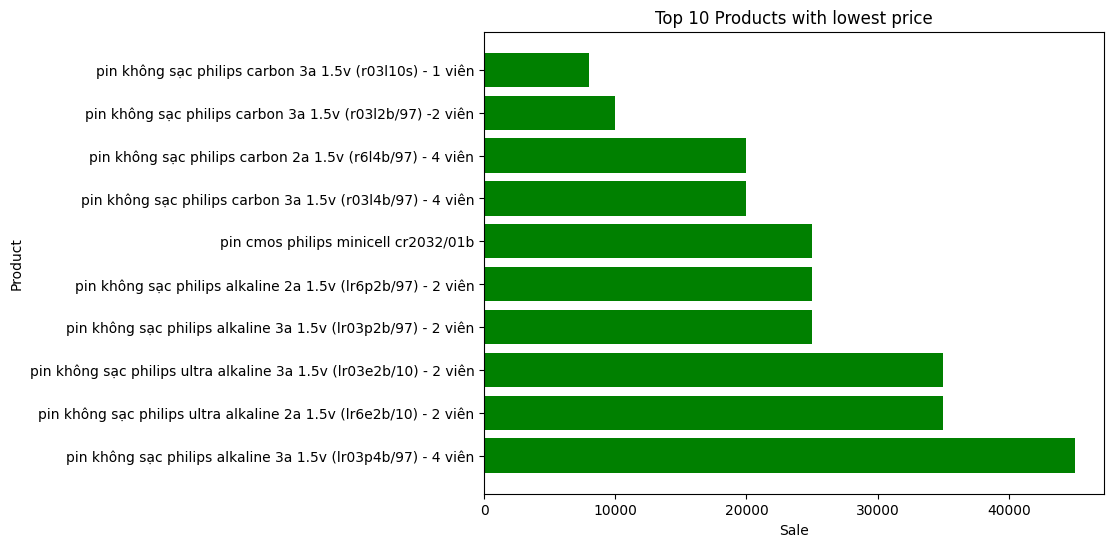

,Website,Name,Price,Unprice,Sale,Promotion,Summary,Status,Brand,price_range,Type
5178,https://philong.com.vn,pin không sạc philips alkaline 3a 1.5v (lr03p4...,45000,45000 đ,0,Không có,Pin Kiềm (Alkaline) AAA\nHạn sử dụng lâu lên đ...,1,philips,Under 1M,pin không sạc
5180,https://philong.com.vn,pin không sạc philips ultra alkaline 2a 1.5v (...,35000,35000 đ,0,Không có,Pin kiềm\nVỉ gồm 2 viên\nTính ứng dụng cao\nHạ...,1,philips,Under 1M,pin không sạc
5181,https://philong.com.vn,pin không sạc philips ultra alkaline 3a 1.5v (...,35000,35000 đ,0,Không có,Pin Kiềm (Alkaline)\nĐiện thế 1.5 V\nVỉ 2 viên,1,philips,Under 1M,pin không sạc
5184,https://philong.com.vn,pin không sạc philips alkaline 3a 1.5v (lr03p2...,25000,25000 đ,0,Không có,Pin Alkaline AA\nHạn sử dụng lên đến 5 năm\nT...,1,philips,Under 1M,pin không sạc
5185,https://philong.com.vn,pin không sạc philips alkaline 2a 1.5v (lr6p2b...,25000,25000 đ,0,Không có,Pin Alkaline AA\nHạn sử dụng lên đến 5 năm\nT...,1,philips,Under 1M,pin không sạc
5187,https://philong.com.vn,pin cmos philips minicell cr2032/01b,25000,25000 đ,0,Không có,Điện thế 3V\nDung luợng pin 210 mAH\nThời hạn ...,0,philips,Under 1M,pin cmos
5188,https://philong.com.vn,pin không sạc philips carbon 3a 1.5v (r03l4b/9...,20000,20000 đ,0,Không có,Dễ dàng sử dụng\nThân thiện với môi trường\nNg...,1,philips,Under 1M,pin không sạc
5189,https://philong.com.vn,pin không sạc philips carbon 2a 1.5v (r6l4b/97...,20000,20000 đ,0,Không có,Vỉ gồm 4 viên Pin AA\nLoại: Pin kẽm\nDễ dàng s...,1,philips,Under 1M,pin không sạc
5193,https://philong.com.vn,pin không sạc philips carbon 3a 1.5v (r03l2b/9...,10000,10000 đ,0,Không có,Vỉ gồm 2 viên pin AAA\nLoại Pin: Kẽm\nDễ dàng ...,1,philips,Under 1M,pin không sạc
5194,https://philong.com.vn,pin không sạc philips carbon 3a 1.5v (r03l10s)...,8000,8000 đ,0,Không có,Size AAA\nĐiện thế 1.5 V\nThời gian sử dụng lâu,1,philips,Under 1M,pin không sạc


In [17]:
bottom_products = df[df['Price']!=0].nsmallest(10,'Price')
bottom_products = bottom_products.sort_values(ascending=False,by='Price')
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(bottom_products['Name'], bottom_products['Price'], color='green')
ax.set_xlabel('Sale')
ax.set_ylabel('Product')
ax.set_title('Top 10 Products with lowest price')
plt.show()
bottom_products

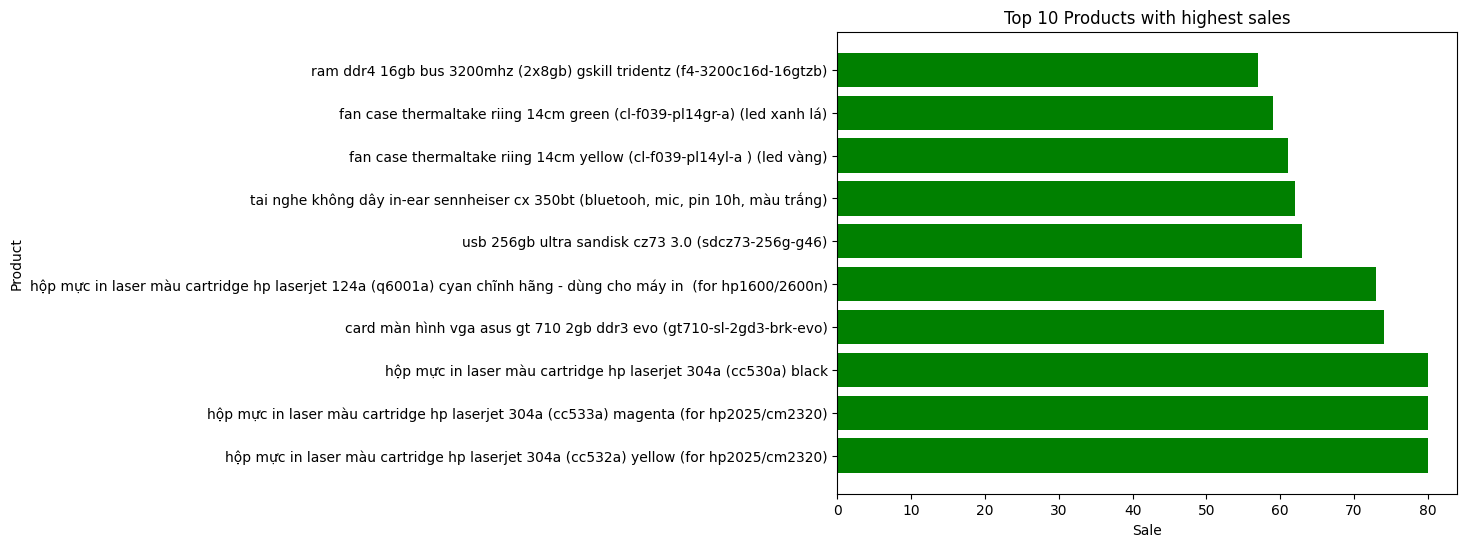

In [44]:
top_products = df.nlargest(10, 'Sale')

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_products['Name'], top_products['Sale'], color='green')
ax.set_xlabel('Sale')
ax.set_ylabel('Product')
ax.set_title('Top 10 Products with highest sales')
plt.show()

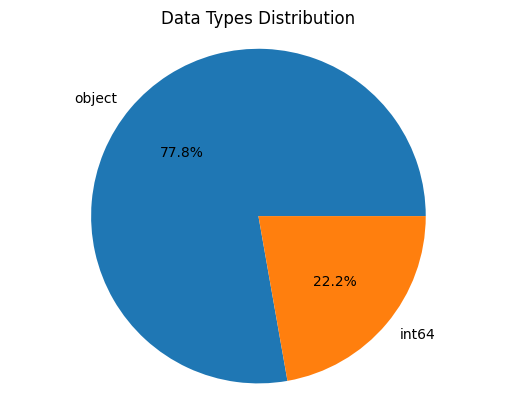

In [11]:
data_types_count = df.dtypes.value_counts()

plt.pie(data_types_count, labels=data_types_count.index, autopct='%1.1f%%')
plt.title('Data Types Distribution')
plt.axis('equal')
plt.show()


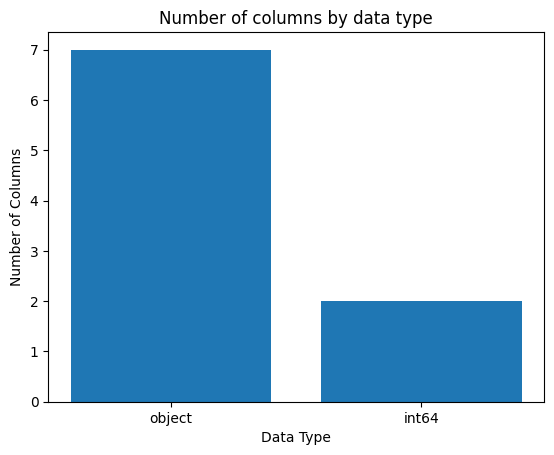

In [14]:
plt.bar(data_types_count.index.astype(str), data_types_count.values)
plt.title('Number of columns by data type')
plt.xlabel('Data Type')
plt.ylabel('Number of Columns')
plt.show()

Top 10 loại sản phẩm theo số lượng:

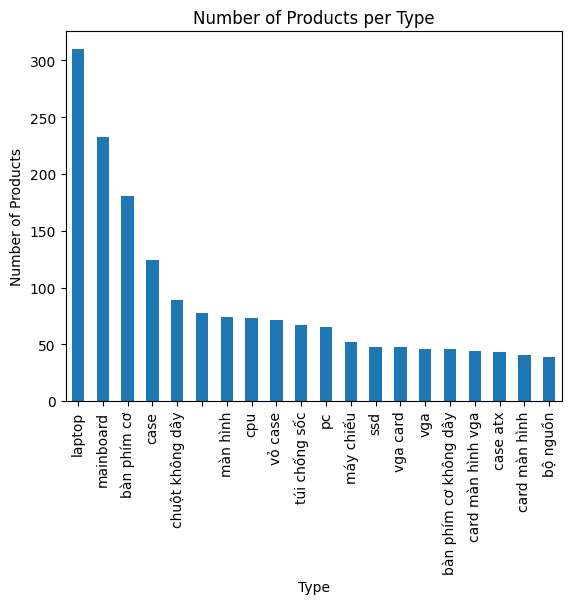

In [31]:
type_counts = df['Type'].value_counts().head(20)

# create a bar chart of the data
type_counts.plot(kind='bar', title='Number of Products per Type', xlabel='Type', ylabel='Number of Products')

# display the plot
plt.show()

In [34]:
df['Type']


0                                                  laptop
1                                                  chuột
2       wifi 6 tplink archer ax53 gigabit băng tần kép...
3                        router wifi băng tầng kép ac1200
4                                            máy in lazer
                              ...                        
6890                                    áo khoác thể thao
6891                                    túi đựng phụ kiện
6892                                         micro có dây
6893                                         túi đeo chéo
6894                                      balo bảo vệ loa
Name: Type, Length: 6895, dtype: object